# mRNA

All data manipulation was done before the start of this quarto manuscript project. Code is in: C:/Users/alosvendsen/OneDrive - Syddansk Universitet/PhD/R_code/manuscript_1 And copied to this project: /notebooks/qPCR/old_qPCR_import

Donor 1: timepoints = 72 and 120 hours Donor 2: timepoints = 24, 72, and 120 hours Donor 2: timepoints = 24, 72, and 120 hours

## Setup

In [ ]:
#| warning: false
#| message: false

groundhog.date <- "2024-01-01"
groundhog::meta.groundhog(date = groundhog.date)

Now using 'groundhog_3.1.2'.

here() starts at C:/Users/alosvendsen/Documents/R/inflammation_spheroids

Successfully attached 'here_1.0.1'

Successfully attached 'data.table_1.14.10'

Successfully attached 'ggplot2_3.4.4'

Successfully attached 'patchwork_1.1.3'

Successfully attached 'RColorBrewer_1.1-3'

## Finalize the data and save the data table

### Load data, remove 0.001 ng/ml cytokine concentrations, calculate means for each experiment.

In [ ]:
#### Load data, filter data and calculate geometric means
# data <- readRDS(here("notebooks/qPCR/data_processed/final_dataframe.rds"))
# 
# # Remove the lowest concentrations of cytokines, since not used in all 
# # Experiments. Note 24 hour time points was only used in one experiment
# plot_data <- data[!treatment %chin% c("0.001 ng/ml IL-1B", "0.001 ng/ml IL-6")]
# 
# 
# # Calculate the mean expression grouped by experiment, condition, treatment, and time. USE GEOMETRIC MEAN when averaging normalized expression (RQ) values. 
# plot_data[,
#           bio_group_mean_expression := geometric_mean(normalized_expression),
#           by = .(experiment, condition, treatment, time, target)
#           ]
# 
# # Save the data
# saveRDS(plot_data, here("notebooks/qPCR/data_final_for_plotting/plot_data.rds"))

In [ ]:
# rmv <- ls()[!grepl(x =ls(), pattern = "geometric")]
# 
# rm(list = rmv)

## Plots and downregulation data

In [ ]:
plot_data <- readRDS(here("notebooks/qPCR/data_final_for_plotting/plot_data.rds"))

### Main plot CYP3A4 expression after IL-6 and IL-1B

Subset data and get time means

In [ ]:
# Subset for 3A4
data_3A4 <- plot_data[treatment != "0.0001% BSA" & target == "CYP3A4"]

# Get means of all time points
data_3A4[,
         time_means := geometric_mean(bio_group_mean_expression),
         by = .(condition, treatment, time)]


overall_means <-
  data_3A4[,
           .(overall_mean = mean(time_means)),
           by = .(condition, treatment)
           ]

# data_3A4[]
# 
# overall_means[]

Plot. Updated below withot facet

In [ ]:
# ggplot(data_3A4[condition == "IL-6"]) +
#   geom_point(mapping = aes(x = treatment,
#                            y = time_means,
#                            fill = factor(time),
#                            shape = factor(time)
#                            ),
#              shape = c("21", "22", "23")
#              size = 7)
#              

# plot_3A4 <- 
#   ggplot(data = data_3A4,
#          aes(x = treatment,
#              y = time_means,
#              color = factor(time)
#              )
#          ) +
#   facet_wrap(facets = vars(condition)) +
#   geom_point(size = 5) + 
#   scale_color_brewer(palette = "Set2") +
#   geom_point(data = overall_means, 
#              aes(x = treatment,
#                  y = overall_mean),
#              size = 8,
#              color = "black",
#              alpha = 0.7) +
#   theme_bw() +
#   labs(title = "Relative expression of CYP3A4",
#        x = "Treatment",
#        y = "Expression relative to vehicle control",
#        color = "Time"
#        )  +
#   theme(axis.text.x = element_text(angle = 30, hjust = 1),
#         axis.title.y = element_text(vjust = 3, face = "bold"),
#         axis.title.x = element_text(vjust = -1.5, face ="bold"),
#         plot.title = element_text(face = "bold"),
#         legend.title = element_text(face = "bold"),
#         legend.position = "bottom"
#      )
# 
# 
# plot_3A4

**Main plot**

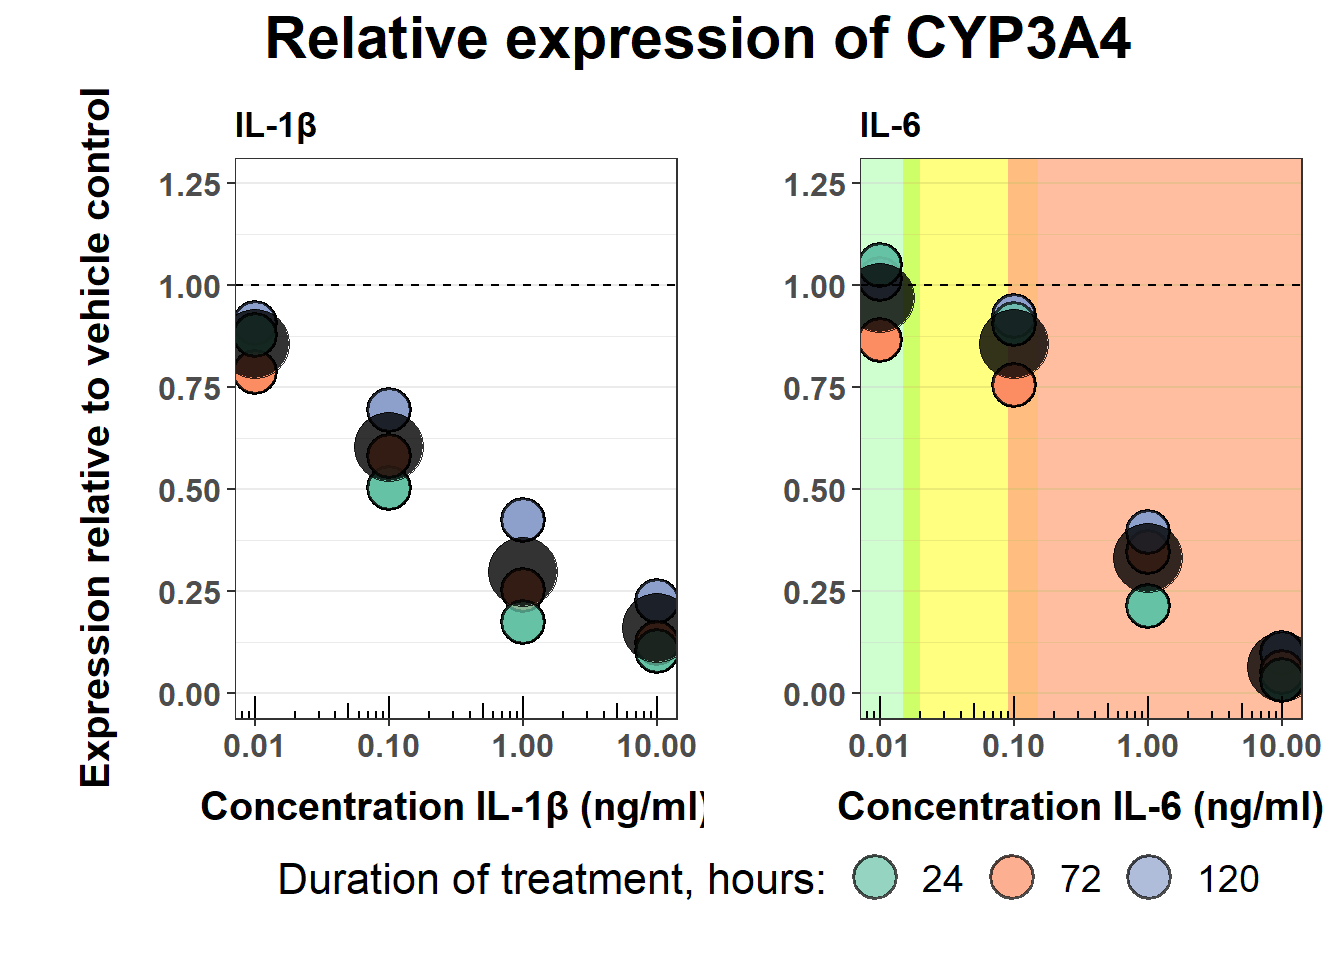

In [ ]:
#| label: fig-mRNA-CYP3A4-main
#| fig-cap: "Relative CYP3A4 mRNA expression. Small points are mean of three donors for 72 and 120 hours, and two donors for 24 hours (donors two and three)"

# Subset the data for each condition
data_IL1B <- data_3A4[condition == "IL-1B"]
data_IL1B_means <- overall_means[condition == "IL-1B"]
data_IL6 <- data_3A4[condition == "IL-6"]
data_IL6_means <- overall_means[condition == "IL-6"]

# Split the treatment string so we can have a continous x axis. Otherwise we cannot put lines or rectangles at relevant levels of ILs
data_IL1B[, conc := tstrsplit(treatment, " ", type.convert = TRUE, keep = 1)]
data_IL1B_means[, conc := tstrsplit(treatment, " ", type.convert = TRUE, keep = 1)]
data_IL6[, conc := tstrsplit(treatment, " ", type.convert = TRUE, keep = 1)]
data_IL6_means[, conc := tstrsplit(treatment, " ", type.convert = TRUE, keep = 1)]

# Generate the plot for IL-1B condition
plot_IL1B <-
  ggplot(
    data_IL1B,
    aes(
      x = conc,
      y = time_means
    )
  ) +
  ## First layer ##
  geom_point(
    aes(
      fill = factor(time)
    ),
    size = 7,
    shape = 21,  # Use a shape that is filled, 21 is filled
    color = "black",
    stroke = 1,
    alpha = .7
  ) +
  scale_fill_brewer(palette = "Set2") +
  ## Second layer ##
  geom_point(
    data = data_IL1B_means,
    aes(
      x = conc,
      y = overall_mean
    ),
    size = 12, alpha = 0.80
  ) +
  ## Modifications ##
  labs(
    x = "Treatment",
    y = "Expression relative to vehicle control",
    fill = "Duration of treatment, hours:"
  ) +
  scale_y_continuous(limits = c(0, 1.25), n.breaks = 6) +
  scale_x_log10(
    name = "Concentration IL-1β (ng/ml)") +
  annotation_logticks(sides = "b")  +
  geom_hline(yintercept = 1, linetype = "dashed") +
  theme_bw() +
  theme(
    #axis.text.x = element_text(angle = 30, hjust = 1),
    axis.text = element_text(size = 12, face = "bold"),
    axis.title.y = element_text(vjust = 3,
                                face = "bold",
                                size = 15,
                                margin = margin(t = 0, r = 10, b = 0, l = 0)),
    plot.margin = margin(t = 10, r = 10, b = 10, l = 30),
    axis.title.x = element_text(vjust = -1.5, face = "bold", size = 15),
    plot.title = element_text(face = "bold"),
    #legend.title = element_text(face = "bold"),
    legend.position = "bottom",
    panel.grid.major.x = element_blank(),
    panel.grid.minor.x = element_blank()
  )


# plot_IL1B


# Generate the plot for IL-6 condition
plot_IL6 <-
  ggplot(
    data_IL6,
    aes(
      x = conc,
      y = time_means
    )
  ) +
  geom_rect(xmin = log10(0.00000000001),  #Rect to indicate phys levels. Call before main layes so it does not cover these. 
            xmax = log10(0.02),
            ymin = -Inf,
            ymax = Inf,
            fill = "lightgreen",
            alpha = 0.006
            ) +
  geom_rect(xmin = log10(0.015),  #Rect to indicate phys levels. Call before main layes so it does not cover these. 
            xmax = log10(0.15),
            ymin = -Inf,
            ymax = Inf,
            fill = "yellow",
            alpha = 0.006
            ) +
  geom_rect(xmin = log10(0.09),  #Rect to indicate phys levels. Call before main layes so it does not cover these. 
            xmax = log10(Inf),
            ymin = -Inf,
            ymax = Inf,
            fill = "coral",
            alpha = 0.006
            ) +
  ## First layer ##
  geom_point(
    aes(
      fill = factor(time)
    ),
    size = 7,
    shape = 21,  # Use a shape that is filled, 21 is filled
    color = "black",
    stroke = 1,
    alpha = .7
  ) +
  scale_fill_brewer(palette = "Set2") +
  ## Second layer ##
  geom_point(
    data = data_IL6_means,
    aes(
      x = conc,
      y = overall_mean
    ),
    size = 12, alpha = 0.8
  ) +
  ## Modifications ##
  labs(
    x = "Treatment",
    y = "Expression relative to vehicle control",
    fill = "Duration of treatment, hours:"
  ) +
  scale_y_continuous(limits = c(0, 1.25), n.breaks = 6) +
  scale_x_log10(name = "Concentration IL-6 (ng/ml)") +
  annotation_logticks(sides = "b")  +
  geom_hline(yintercept = 1, linetype = "dashed") +
  theme_bw() +
  theme(
    #axis.text.x = element_text(angle = 30, hjust = 1),
    axis.text = element_text(size = 12, face = "bold"),
    axis.title.y = element_text(vjust = 3,
                                face = "bold",
                                size = 20,
                                margin = margin(t = 0, r = 10, b = 0, l = 0)),
    axis.title.x = element_text(vjust = -1.5, face = "bold", size = 15),
    plot.title = element_text(face = "bold"),
    #legend.title = element_text(face = "bold"),
    legend.position = "bottom",
    plot.margin = margin(t = 10, r = 10, b = 10, l = 30),
    panel.grid.major.x = element_blank(),
    panel.grid.minor.x = element_blank()
  )

# plot_IL6



#### Combine the plots
# Update individual plots for combination
# Remove the y-axis title from the second plot
plot_IL6 <- plot_IL6 + theme(axis.title.y = element_blank(),
                             #axis.title.x = element_blank(),
                             ) +
  ggtitle("IL-6")

plot_IL1B <- plot_IL1B + 
  ggtitle("IL-1β")


# Combine the plots with a common legend at the bottom
combined_plot <- plot_IL1B + plot_IL6 +
  plot_layout(guides = 'collect') & # This collects and uses a single guide (legend)
  plot_annotation(
    title = 'Relative expression of CYP3A4',
    theme = theme(
      plot.title = element_text(size = 22, face = "bold", hjust = 0.5), # Increase the size of the main title
      plot.subtitle = element_text(size = 18) # Increase the size of the subtitles
    )
  ) & 
  theme(
    legend.position = "bottom",
    legend.text = element_text(size = 14), # Increase the size of the legend text
    legend.title = element_text(size = 16) # Increase the size of the legend title
  )

# Print the combined plot
combined_plot

# ggsave(filename = here("notebooks/qPCR/output/mrna_3A4_main.png"), device = "png", dpi = "retina")

### CYP3A4 supplementary plot facetted on condition time and experiment

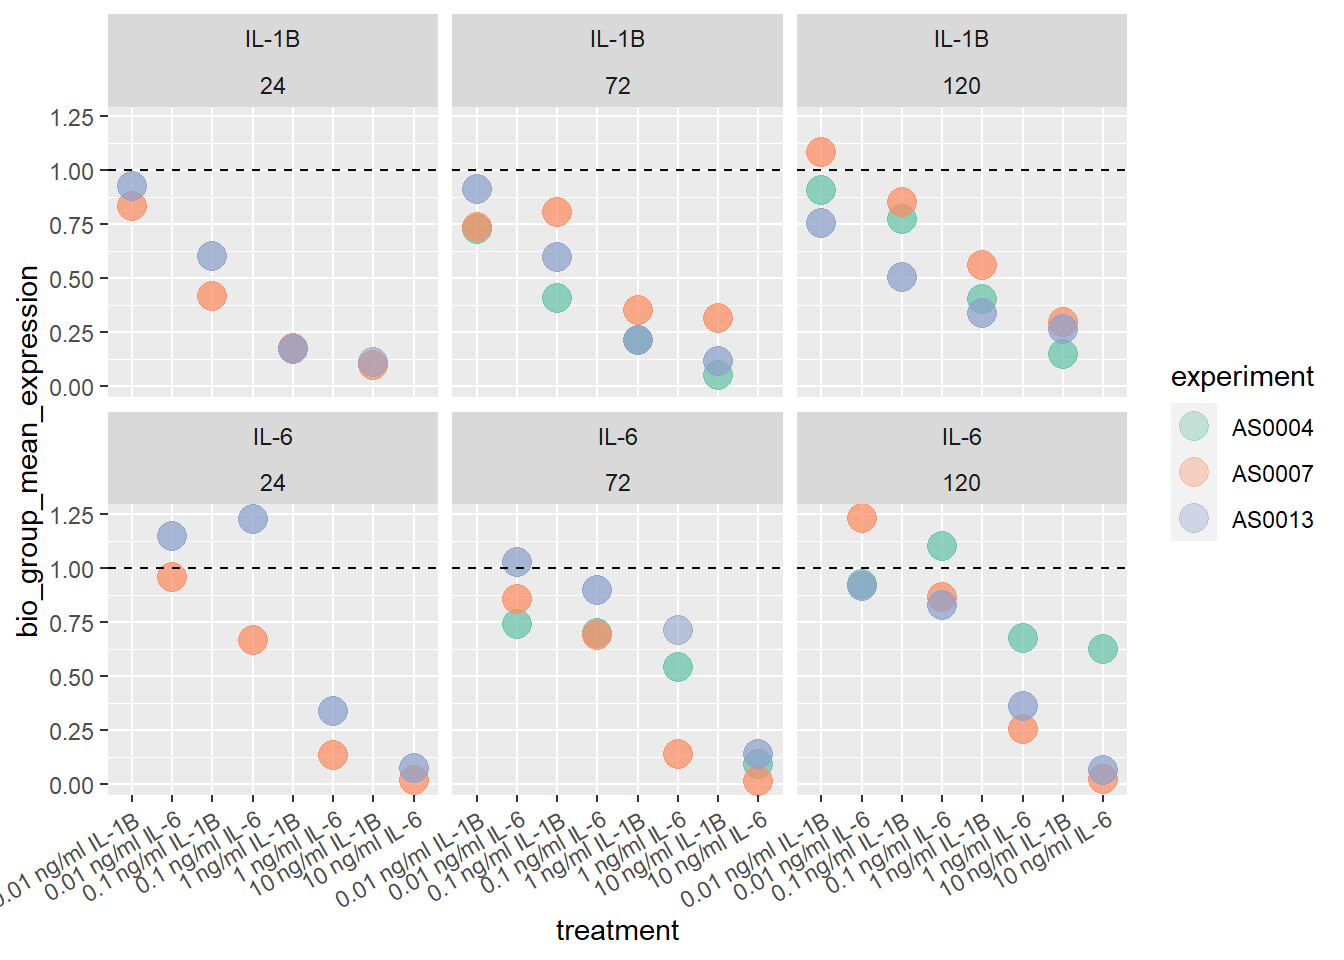

In [ ]:
#| label: fig-CYP3A4_supp
#| fig-cap: "Relative 3A4 expression facetted on treatment condition and time, ie. mean of each experiment/donor"

ggplot(data = data_3A4,
       aes(x = treatment,
           y = bio_group_mean_expression,
           color = experiment)
       )+
  geom_point(size = 5, alpha = 0.35) +
  geom_hline(yintercept = 1, linetype = "dashed") +
  scale_color_brewer(palette = "Set2") +
  facet_wrap(facets = vars(condition, time)) +
  theme(axis.text.x = element_text(angle = 30, hjust = 1))

#### 3A4 IL-6 downregulation table and plot

Subset

In [ ]:
# Subset for 3A4 and IL-6
cyp3A4_IL6 <- plot_data[treatment != "0.0001% BSA" & condition == "IL-6" & target == "CYP3A4"]
cyp3A4_IL6[,
           time_means := geometric_mean(bio_group_mean_expression),
           by = .(treatment, time)
           ]

# Get the average downregulation grouped by treatment. Ie, the average of the average grouped by time. 
tbl_CYP3A4_IL6 <- 
  cyp3A4_IL6[order(treatment),
           .(down = mean(time_means),
             down_pct = 100 - mean(time_means) *100),
           by = .(treatment)]

tbl_CYP3A4_IL6

         treatment       down  down_pct
1: 0.01 ng/ml IL-6 0.96853976  3.146024
2:  0.1 ng/ml IL-6 0.85684974 14.315026
3:    1 ng/ml IL-6 0.33064588 66.935412
4:   10 ng/ml IL-6 0.06374017 93.625983

**Plot 3a4 il-6**

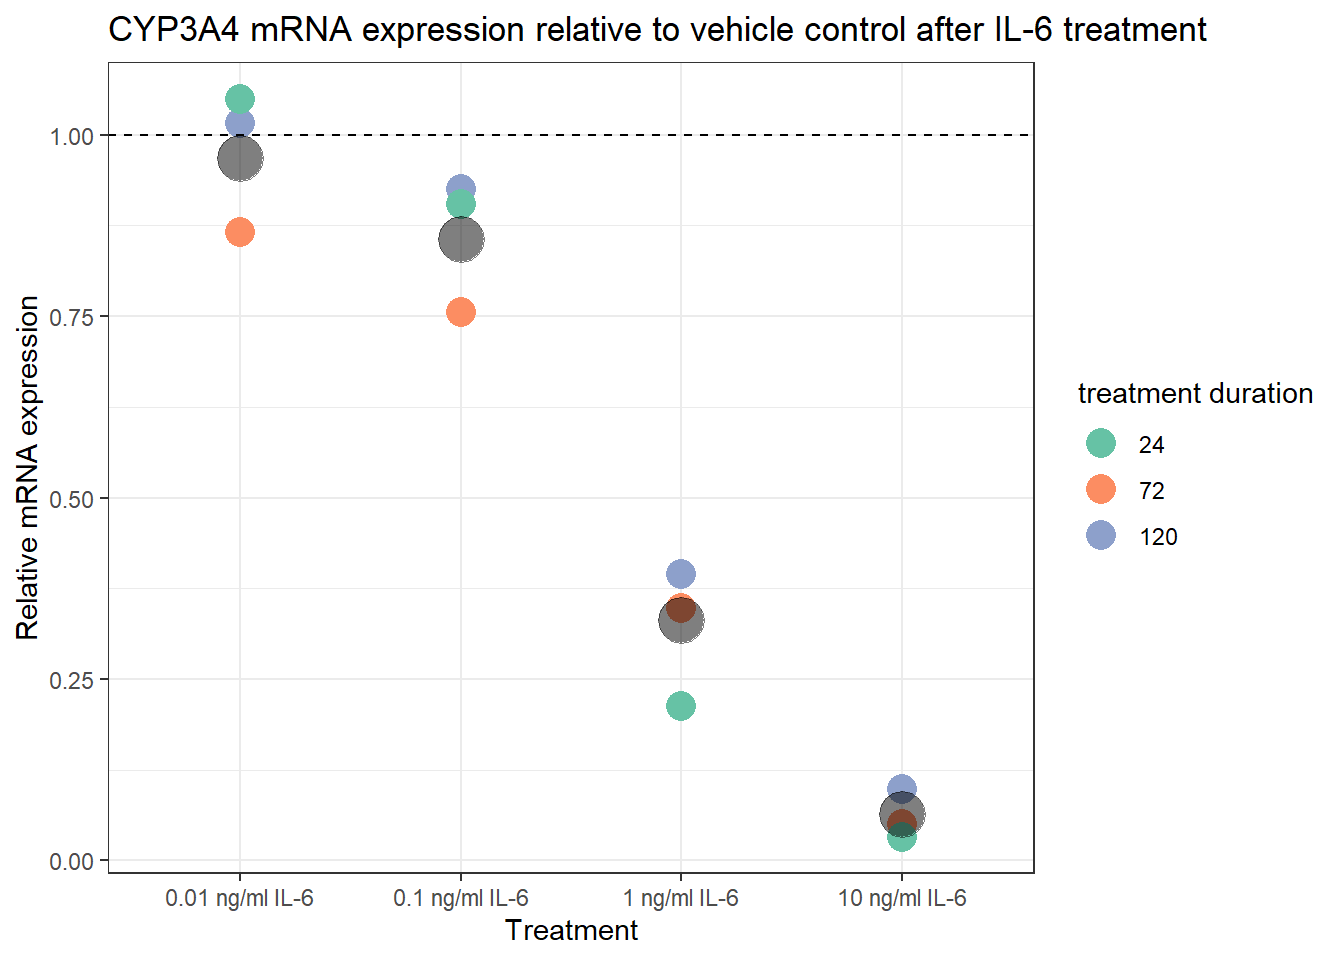

In [ ]:
#| label: fig-mRNA-CYP3A4-IL6
#| fig-cap: "Small points are mean of three donors for 72 and 120 hours, and two donors for 24 hours"

plot_mRNA_3A4_IL6 <- 
  ggplot(data = cyp3A4_IL6, 
         aes(x = treatment,
             y = time_means,
             color = factor(time)
             )
         ) +
  geom_point(size = 5) +
  scale_color_brewer(palette = "Set2") +
  stat_summary(fun = "mean", geom = "point", color = "black", size = 8, alpha = 0.5) +
  geom_hline(yintercept = 1, linetype = "dashed") +
  labs(title = "CYP3A4 mRNA expression relative to vehicle control after IL-6 treatment",
       x = "Treatment",
       y = "Relative mRNA expression",
       color = "treatment duration") +
  theme_bw()

plot_mRNA_3A4_IL6

##### Plot individual means of 120 hour treatment from each donor.

Had some weird values from donor AS0004

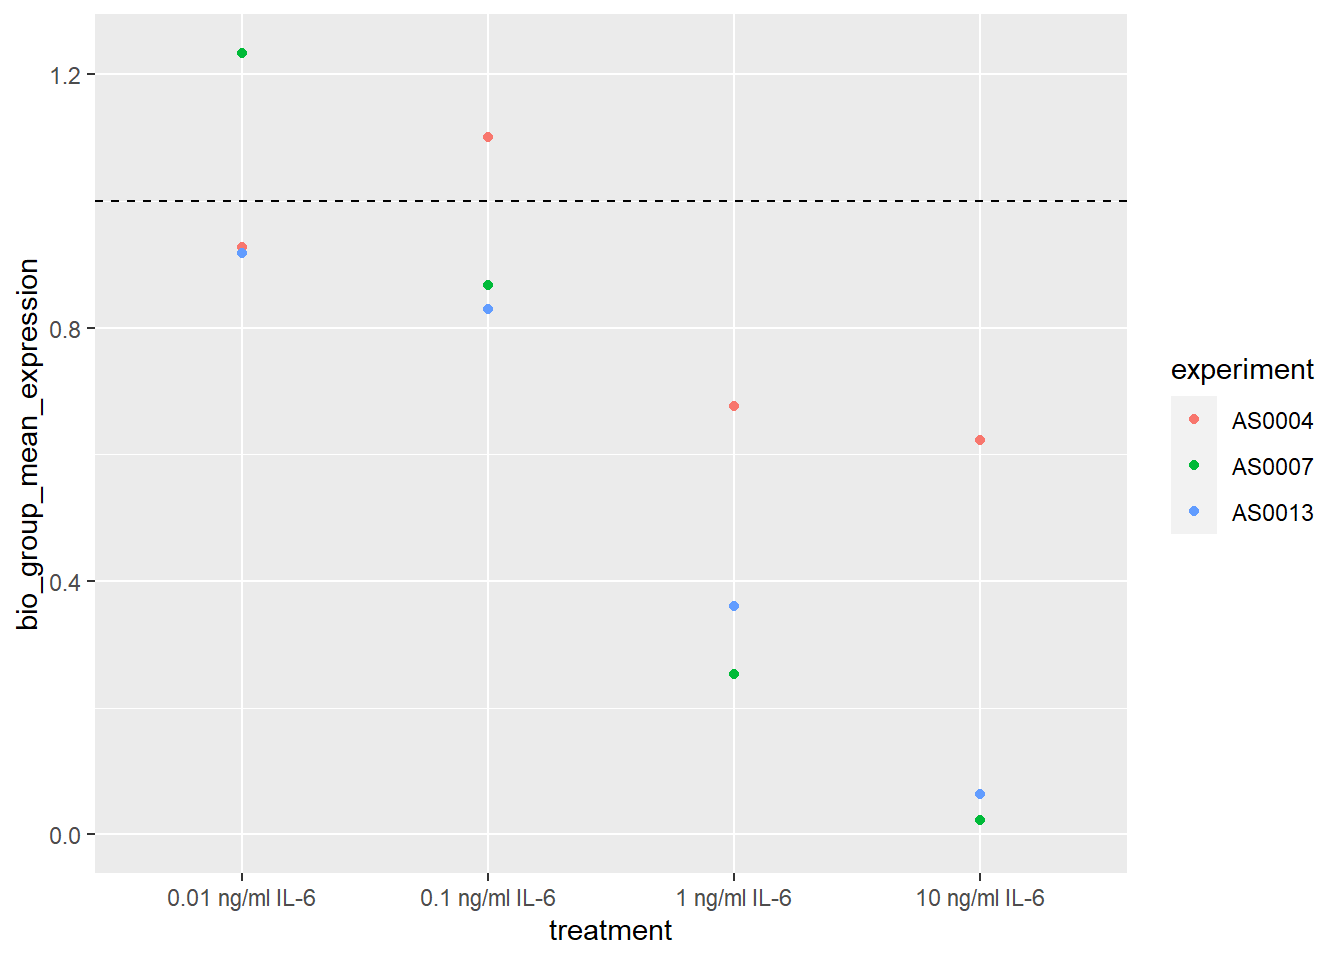

In [ ]:
#| label: fig-mrna-120hours
#| fig-cap: "Means of each donor for just 120 hours. Donor one had way higher Cq values"

ggplot(data = cyp3A4_IL6[time == 120], aes(x = treatment, y = bio_group_mean_expression)) +
  geom_point(aes(color = experiment)) +
  scale_y_continuous(limits = c(0, NA)) +
  geom_hline(yintercept = 1, linetype = "dashed")

#### 3A4 IL-1B downregulation table and plot

Subset data

In [ ]:
# Subset for 3A4 and IL-1B
cyp3A4_IL1B <- plot_data[treatment != "0.0001% BSA" & condition == "IL-1B" & target == "CYP3A4"]

cyp3A4_IL1B[,
           time_means := geometric_mean(bio_group_mean_expression),
           by = .(treatment, time)
           ]

# Get the average downregulation grouped by treatment. Ie, the average of the average grouped by time. 
tbl_CYP3A4_IL1B <- 
  cyp3A4_IL1B[order(treatment),
              .(down = mean(time_means),
               down_pct = 100 - mean(time_means) *100),
               by = .(treatment)]

tbl_CYP3A4_IL1B

          treatment      down down_pct
1: 0.01 ng/ml IL-1B 0.8556492 14.43508
2:  0.1 ng/ml IL-1B 0.6039612 39.60388
3:    1 ng/ml IL-1B 0.2979700 70.20300
4:   10 ng/ml IL-1B 0.1595929 84.04071

**Plot IL-1B CYP3A4**

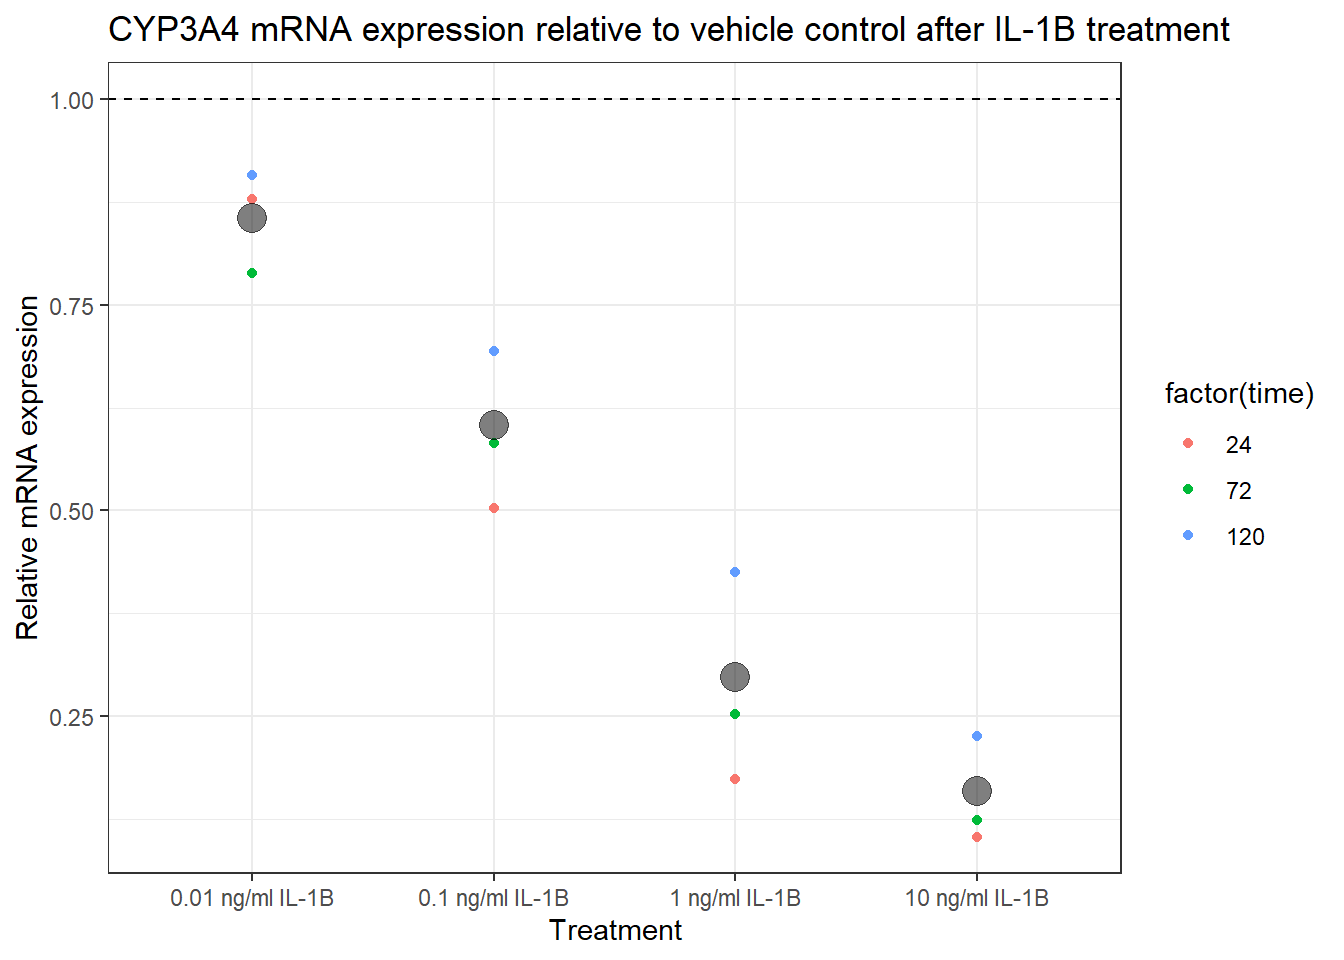

In [ ]:
#| label: fig-mrna-3a4-il1B
#| fig-cap: "Small points are mean of three donors for 72 and 120 hours, and two donors for 24 hours"

ggplot(data = cyp3A4_IL1B, aes(x = treatment, y = time_means, color = factor(time))) +
  geom_point() +
  stat_summary(fun = "mean", geom = "point", color = "black", size = 5, alpha = 0.5) +
  geom_hline(yintercept = 1, linetype = "dashed") +
  labs(title = "CYP3A4 mRNA expression relative to vehicle control after IL-1B treatment") +
  ylab("Relative mRNA expression") +
  xlab("Treatment") +
  theme_bw()

Plot 120 hour means of each donor

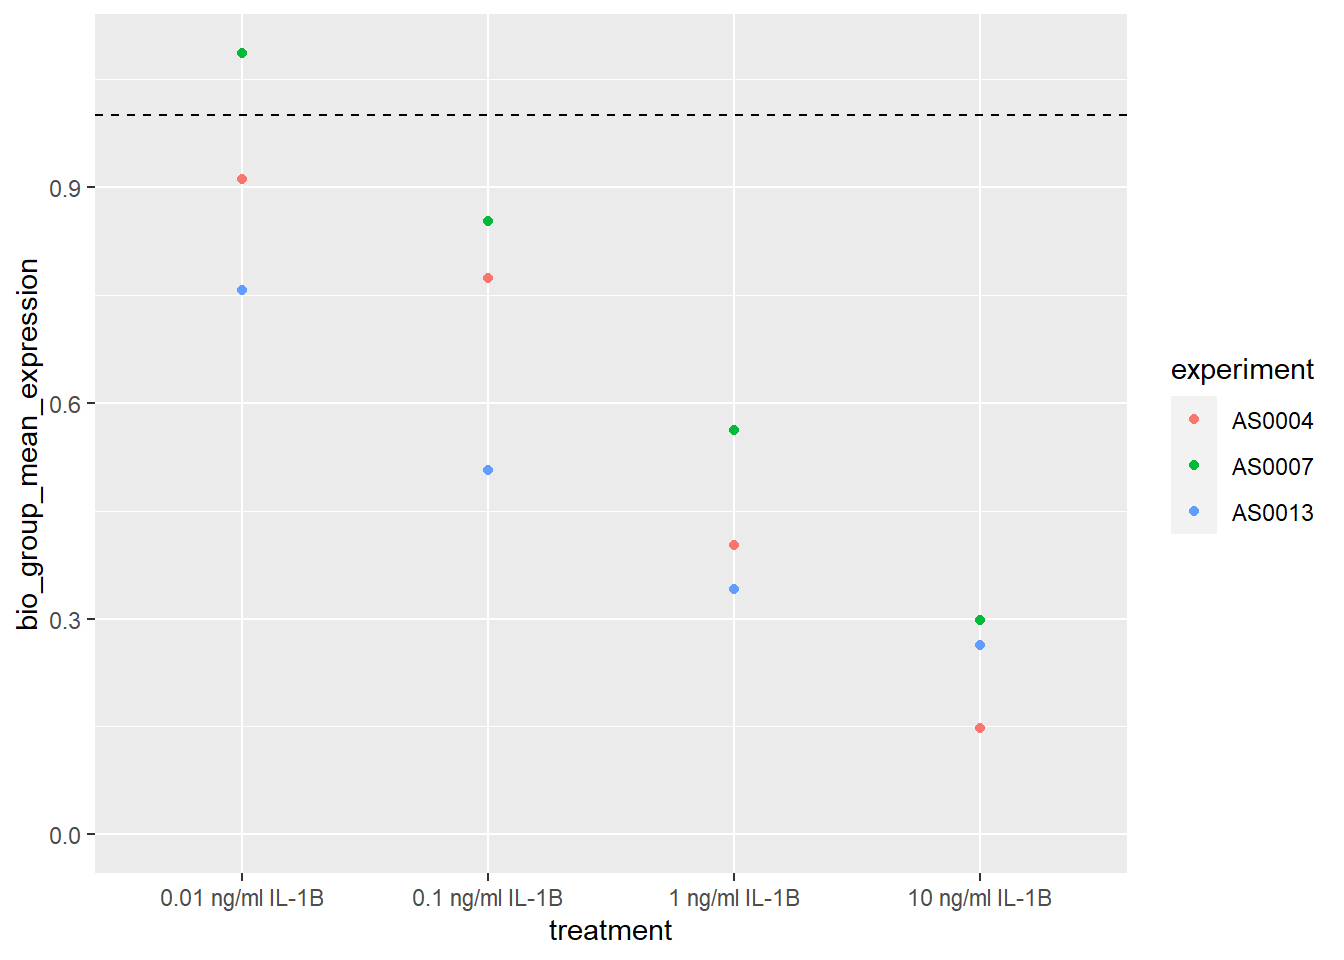

In [ ]:
ggplot(data = cyp3A4_IL1B[time == 120], aes(x = treatment, y = bio_group_mean_expression)) +
  geom_point(aes(color = experiment)) +
  scale_y_continuous(limits = c(0, NA)) +
  geom_hline(yintercept = 1, linetype = "dashed")

### Other CYPs

In [ ]:
# # Filter for CYP enzymes only, remove lowest concentration
# cyp_data <- plot_data[target %like% "CYP" & !treatment %like% "0.001"]
# 
# # Split data based on condition, and remove 3A4 since done separately. 
# cyp_data_IL6 <- cyp_data[condition == "IL-6" & target != "CYP3A4"]
# cyp_data_IL1B <- cyp_data[condition == "IL-1B" & target != "CYP3A4"]
# 
# # Define a function to create the plot
# create_plot <- function(cyp_data) {
#   # Calculate mean normalized expression for each combination of CYP enzyme, treatment, and experiment
#   cyp_means <- cyp_data[, .(mean_normalized_expression = mean(normalized_expression)),
#                         by = .(experiment, treatment, target, time)]
# 
#   # Calculate the overall mean across experiments
#   cyp_overall_means <- cyp_means[, .(overall_mean_normalized_expression = mean(mean_normalized_expression)),
#                                  by = .(treatment, target, time)]
# 
#   # Create and return the plot
#   ggplot() +
#     geom_point(data = cyp_means, aes(x = treatment, y = mean_normalized_expression, color = experiment), alpha = 0.5, size = 4) +
#     geom_point(data = cyp_overall_means, aes(x = treatment, y = overall_mean_normalized_expression),
#                color = "black", size = 8, shape = 18, alpha = 0.7) +
#     scale_y_continuous(limits = c(0,NA)) +
#     facet_wrap(~ target + time, scales = "free_y") +
#     labs(x = "Treatment", y = "Mean Normalized Expression") +
#     theme_minimal() +
#     theme(axis.text.x = element_text(angle = 45, hjust = 1))
# }
# 
# # Create plots
# plot_IL6 <- create_plot(cyp_data_IL6)
# plot_IL1B <- create_plot(cyp_data_IL1B)
# 
# # You can now view, save, or further manipulate these plots:
# plot_IL6
# plot_IL1B

In [ ]:
# # Filter for CYP enzymes only, remove lowest concentration
# cyp_data <- plot_data[target %like% "CYP" & !treatment %like% "0.001"]
# 
# # Split data based on condition, and remove 3A4 since done separately. 
# cyp_data_IL6 <- cyp_data[condition == "IL-6" & target != "CYP3A4"]
# cyp_data_IL1B <- cyp_data[condition == "IL-1B" & target != "CYP3A4"]
# 
# # Define a function to create the plot
# create_plot <- function(cyp_data) {
#  # Calculate mean normalized expression for each combination of CYP enzyme, treatment, and experiment
#  cyp_means <- cyp_data[, .(mean_normalized_expression = mean(normalized_expression)),
#             by = .(experiment, treatment, target, time)]
# 
#  # Calculate the overall mean across experiments
#  cyp_overall_means <- cyp_means[, .(overall_mean_normalized_expression = mean(mean_normalized_expression)),
#                  by = .(treatment, target, time)]
# 
#  # Create and return the plot
#  ggplot() +
#   geom_point(data = cyp_means, aes(x = treatment, y = mean_normalized_expression, color = experiment), alpha = 0.5, size = 4) +
#   geom_point(data = cyp_overall_means, aes(x = treatment, y = overall_mean_normalized_expression),
#         color = "black", size = 8, shape = 18, alpha = 0.7) +
#   scale_y_continuous(limits = c(0,NA)) +
#   facet_wrap(~ target + time, scales = "free_y") +
#   labs(x = "Treatment", y = "Mean Normalized Expression", title = "Normalized Expression after IL-6/IL-1β (Other CYP Enzymes)") +  
#   theme_bw() + # Base theme
#   theme(axis.text.x = element_text(angle = 30, hjust = 1),
#         axis.title.y = element_text(vjust = 3, face = "bold"),
#         axis.title.x = element_text(vjust = -1.5, face = "bold"),
#         plot.title = element_text(face = "bold"),
#         legend.title = element_text(face = "bold")
#   ) 
# }
# 
# # Create plots
# plot_IL6 <- create_plot(cyp_data_IL6)
# plot_IL1B <- create_plot(cyp_data_IL1B)
# 
# # You can now view, save, or further manipulate these plots:
# plot_IL6
# plot_IL1B

In [ ]:
# create_plot_without_time_grouping <- function(cyp_data) {
#   # Calculate mean normalized expression for each combination of CYP enzyme, treatment, and experiment
#   cyp_means <- cyp_data[, .(mean_normalized_expression = mean(normalized_expression)),
#                         by = .(experiment, treatment, target)]
# 
#   # Calculate the overall mean across experiments and time points
#   cyp_overall_means <- cyp_means[, .(overall_mean_normalized_expression = mean(mean_normalized_expression)),
#                                   by = .(treatment, target)]
# 
#   # Create and return the plot
#   ggplot() +
#     geom_point(data = cyp_means, aes(x = treatment, y = mean_normalized_expression, color = experiment), alpha = 0.5, size = 4) +
#     geom_point(data = cyp_overall_means, aes(x = treatment, y = overall_mean_normalized_expression),
#                color = "black", size = 8, shape = 18, alpha = 0.7) +
#     scale_y_continuous(limits = c(0,NA)) +
#     facet_wrap(~ target, scales = "free_y") +
#     labs(x = "Treatment", y = "Mean Normalized Expression (Across Time Points)", title = "Normalized Expression after IL-6/IL-1β") + 
#     theme_bw() + # Base theme 
#     theme(axis.text.x = element_text(angle = 30, hjust = 1),
#           axis.title.y = element_text(vjust = 3, face = "bold"),
#           axis.title.x = element_text(vjust = -1.5, face = "bold"),
#           plot.title = element_text(face = "bold"),
#           legend.title = element_text(face = "bold")
#     ) 
# }
# 
# # Use this function to create the new plots
# plot_IL6_no_time <- create_plot_without_time_grouping(cyp_data_IL6)
# plot_IL1B_no_time <- create_plot_without_time_grouping(cyp_data_IL1B)
# 
# # View, save, or manipulate these plots as needed
# plot_IL6_no_time
# plot_IL1B_no_time

#### usefuld plots

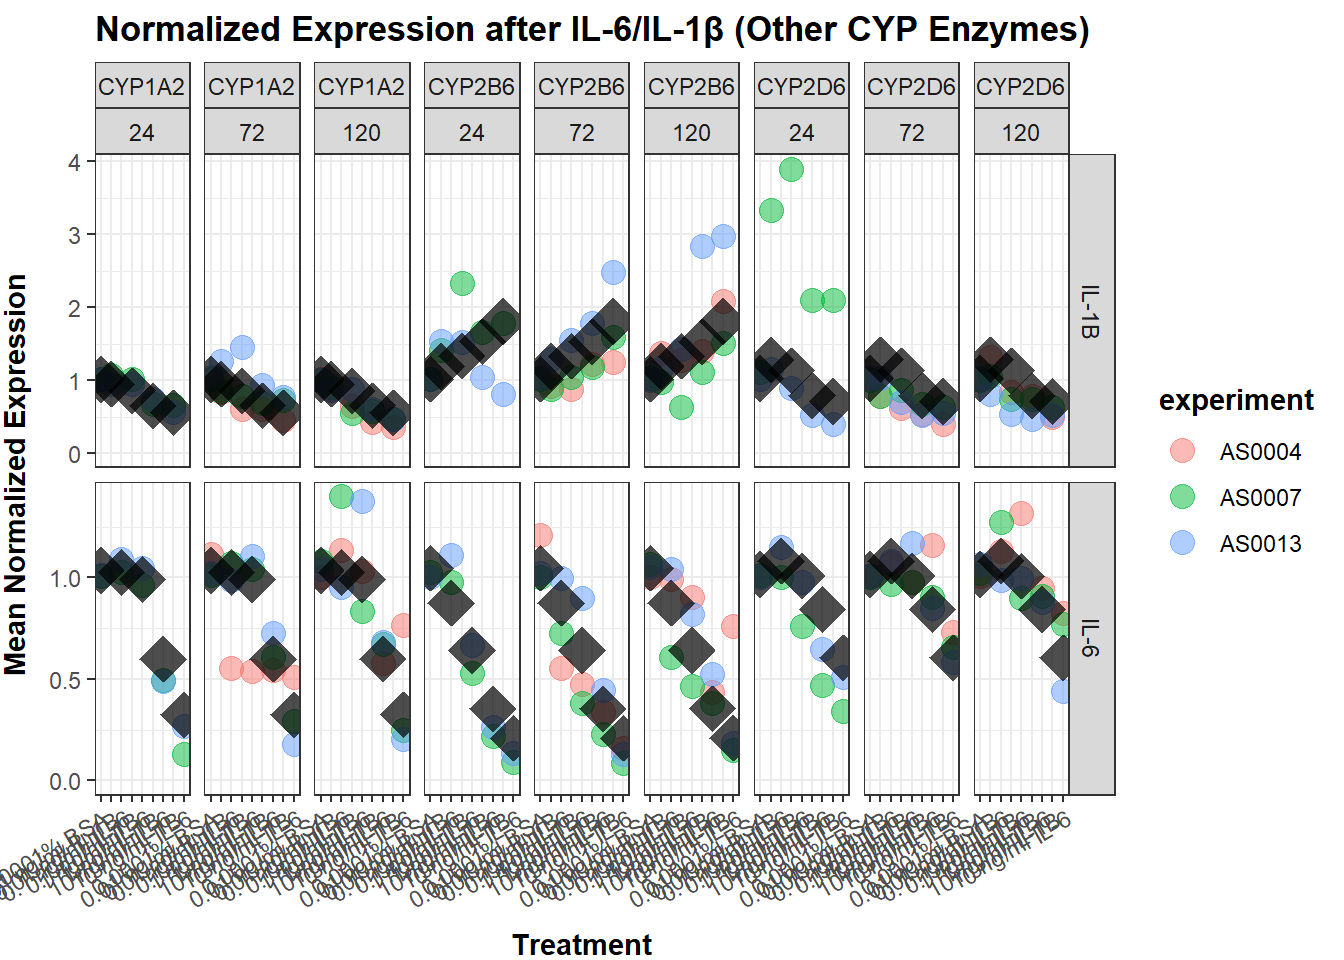

In [ ]:
#| label: fig-rest_of_cyps
#| fig-cap: "just a fig cap"

# Filter for CYP enzymes only, remove lowest concentration
cyp_data <- plot_data[target %like% "CYP" & !treatment %like% "0.001"]

# Split data based on condition, and remove 3A4 
cyp_data_IL6 <- cyp_data[condition == "IL-6" & target != "CYP3A4"]
cyp_data_IL1B <- cyp_data[condition == "IL-1B" & target != "CYP3A4"]

# Combine datasets for single plot
cyp_data_combined <- rbindlist(list(cyp_data_IL6, cyp_data_IL1B))

# Calculate mean normalized expression (including 'condition' for grouping)
cyp_means <- cyp_data_combined[, .(mean_normalized_expression = mean(normalized_expression)),
                               by = .(experiment, treatment, target, time, condition)]

# Calculate overall mean across experiments and time points
cyp_overall_means <- cyp_means[, .(overall_mean_normalized_expression = mean(mean_normalized_expression)),
                                by = .(treatment, target, condition)]

# Create the single faceted plot
ggplot() +
  geom_point(data = cyp_means, aes(x = treatment, y = mean_normalized_expression, color = experiment), alpha = 0.5, size = 4) +
  geom_point(data = cyp_overall_means, aes(x = treatment, y = overall_mean_normalized_expression),
             color = "black", size = 8, shape = 18, alpha = 0.7) +
  scale_y_continuous(limits = c(0, NA)) +
  facet_grid(condition ~ target + time, scales = "free_y", ) +
  labs(x = "Treatment", y = "Mean Normalized Expression", title = "Normalized Expression after IL-6/IL-1β (Other CYP Enzymes)") +  
  theme_bw() + 
  theme(axis.text.x = element_text(angle = 30, hjust = 1),
        axis.title.y = element_text(vjust = 3, face = "bold"),
        axis.title.x = element_text(vjust = -1.5, face = "bold"),
        plot.title = element_text(face = "bold"),
        legend.title = element_text(face = "bold")
  )

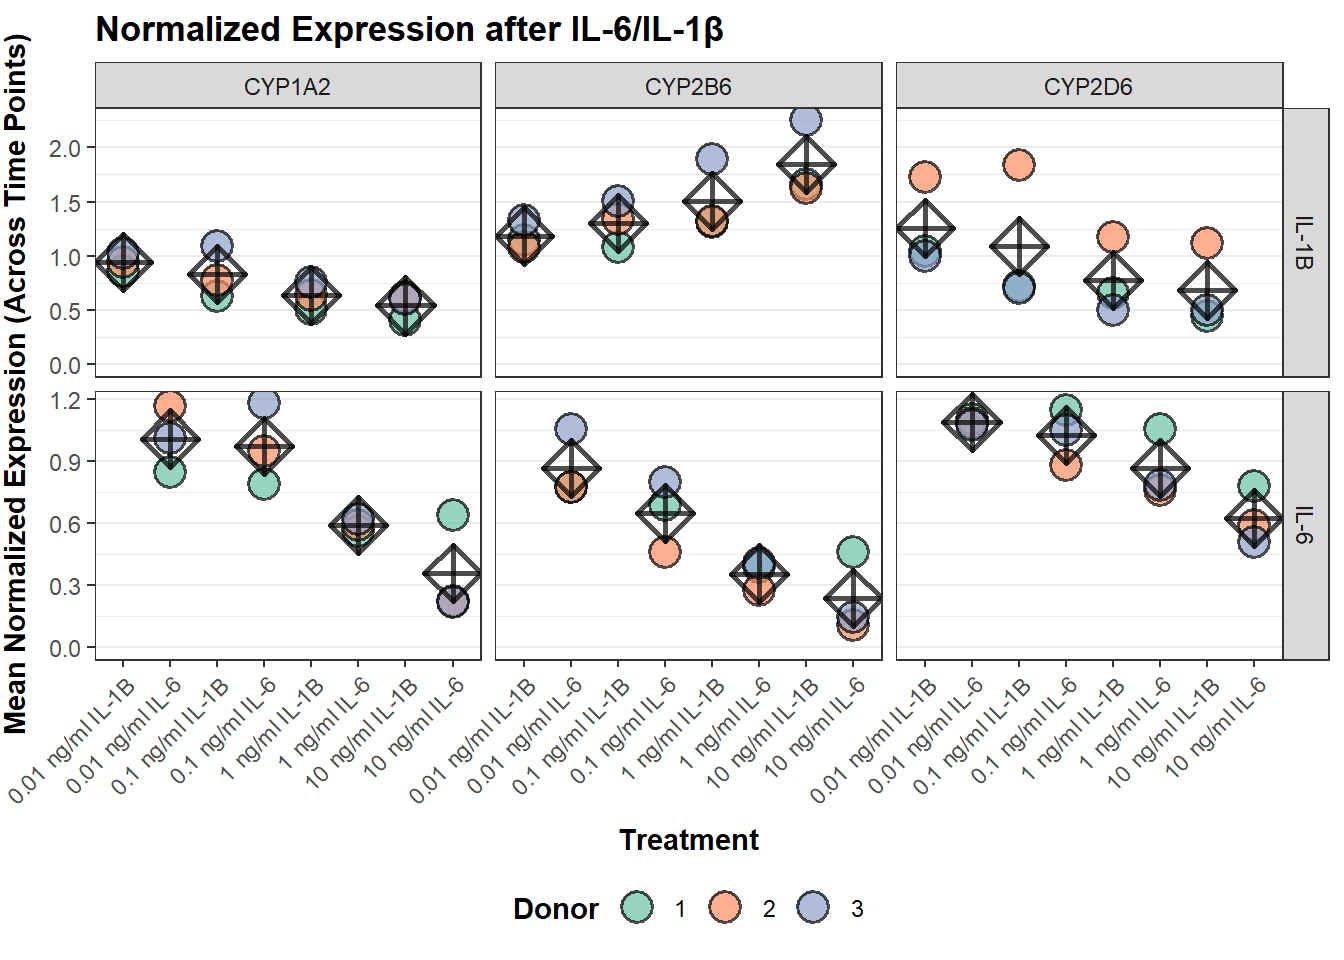

In [ ]:
#| label: fig-rest_of_cyps_overall_mean
#| fig-cap: "Normalized expression, mean across all time points"

# 2. Filtering for CYPs and Removing Low Concentration
cyp_data <- cyp_data[target %like% "CYP" & !treatment %like% "0.0001% BSA"]

# 3. Splitting by Condition 
cyp_data_IL6 <- cyp_data[condition == "IL-6" & target != "CYP3A4"]
cyp_data_IL1B <- cyp_data[condition == "IL-1B" & target != "CYP3A4"]

# 4. Data Preparation (Calculations)
cyp_data_combined <- rbindlist(list(cyp_data_IL6, cyp_data_IL1B)) 

cyp_means <- cyp_data_combined[, .(mean_normalized_expression = mean(normalized_expression)),
                               by = .(experiment, treatment, target, condition)]

cyp_overall_means <- cyp_means[, .(overall_mean_normalized_expression = mean(mean_normalized_expression)),
                                by = .(treatment, target, condition)]

# 5. Plotting (This part remains the same, using ggplot2)
ggplot() +
  geom_point(data = cyp_means,
             aes(x = treatment,
                 y = mean_normalized_expression,
                 fill = experiment
                 ), 
             shape = 21,
             alpha = 0.7,
             size = 5,
             stroke = 1
             ) +
  scale_fill_brewer(palette = "Set2", labels = c("1", "2", "3")) +
  geom_point(data = cyp_overall_means,
             aes(x = treatment,
                 y = overall_mean_normalized_expression
                 ),
             fill = "black",
             color = "black",
             size = 6,
             shape = 9,
             alpha = 0.7,
             stroke = 1.5
             ) +
  scale_y_continuous(limits = c(0, NA)) +
  facet_grid(condition ~ target, scales = "free_y") +
  labs(x = "Treatment",
       y = "Mean Normalized Expression (Across Time Points)",
       title = "Normalized Expression after IL-6/IL-1β",
       fill = "Donor") + 
  theme_bw() + 
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        axis.title.y = element_text(vjust = 3, face = "bold"),
        axis.title.x = element_text(vjust = -1.5, face = "bold"),
        plot.title = element_text(face = "bold"),
        legend.title = element_text(face = "bold"),
        panel.grid.major.x = element_blank(),
        legend.position = "bottom"
  )

# ggsave(filename = here("notebooks/qPCR/output/mrna-rest.png"), device = "png", dpi = "retina")

In [ ]:
plot_IL1B <-
  ggplot(
    data_IL1B,
    aes(
      x = conc,
      y = time_means
    )
  ) +
  ## First layer ##
  geom_point(
    aes(
      fill = factor(time)
    ),
    size = 7,
    shape = 21,  # Use a shape that is filled, 21 is filled
    color = "black",
    stroke = 1,
    alpha = .7
  ) +
  scale_fill_brewer(palette = "Set2") +
  ## Second layer ##
  geom_point(
    data = data_IL1B_means,
    aes(
      x = conc,
      y = overall_mean
    ),
    size = 12, alpha = 0.80
  ) +
  ## Modifications ##
  labs(
    x = "Treatment",
    y = "Expression relative to vehicle control",
    fill = "Duration of treatment, hours:"
  ) +
  scale_y_continuous(limits = c(0, 1.25), n.breaks = 6) +
  scale_x_log10(
    name = "Concentration IL-1β (ng/ml)") +
  annotation_logticks(sides = "b")  +
  geom_hline(yintercept = 1, linetype = "dashed") +
  theme_bw() +
  theme(
    #axis.text.x = element_text(angle = 30, hjust = 1),
    axis.text = element_text(size = 12, face = "bold"),
    axis.title.y = element_text(vjust = 3,
                                face = "bold",
                                size = 15,
                                margin = margin(t = 0, r = 10, b = 0, l = 0)),
    plot.margin = margin(t = 10, r = 10, b = 10, l = 30),
    axis.title.x = element_text(vjust = -1.5, face = "bold", size = 15),
    plot.title = element_text(face = "bold"),
    #legend.title = element_text(face = "bold"),
    legend.position = "bottom",
    panel.grid.major.x = element_blank(),
    panel.grid.minor.x = element_blank()
  )